In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Finding Tree Path Covers

In [11]:
def draw_tree(tree, layout, draw_path=True):
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:red")
    
    if draw_path:
        path_cover=util.path_cover(tree)
        nx.draw_networkx_edges(nx.DiGraph(tree), pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(tree, pos=layout)

### Random tree with edge weights in [0,1)

In [12]:
n = 25
tree = nx.random_labeled_tree(n)
tree = nx.bfs_tree(tree, 0)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

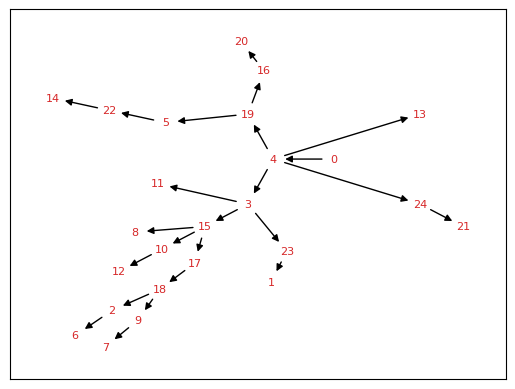

In [13]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

0: (9.08700988289645, 0, 4, None)
4: (8.771426815044586, 0.3155830678518632, 24, 19)
13: (0, 0.4040906278782568, None, None)
19: (3.0116662285791778, 0.4220948746935389, 16, 5)
3: (4.301635145641271, 0.2767159200945043, 23, 15)
24: (0.4286846830420614, 0.6073458830885377, 21, None)
16: (0.719982049065128, 0.8608764170973476, 20, None)
5: (1.2342111178087145, 0.19659664460798765, 22, None)
11: (0, 0.20096457627376108, None, None)
15: (3.1529536429053318, 0.25860892964563764, 8, 17)
23: (0.37654433721563985, 0.5135282358746617, 1, None)
21: (0, 0.4286846830420614, None, None)
20: (0, 0.719982049065128, None, None)
22: (0.2843770368229016, 0.9498340809858129, 14, None)
8: (0, 0.5562760210560221, None, None)
10: (0.19330626794636585, 0.2038038112161139, 12, None)
17: (2.0088855794513836, 0.3944857744515603, 18, None)
1: (0, 0.37654433721563985, None, None)
14: (0, 0.2843770368229016, None, None)
12: (0, 0.19330626794636585, None, None)
18: (2.0088855794513836, -0.10396036891105265, 9, 2)
2

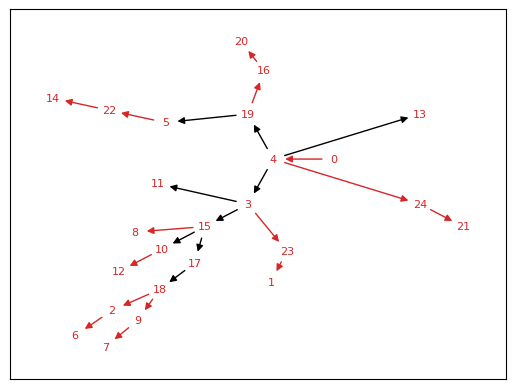

In [15]:
draw_tree(tree, layout)

In [6]:
nx.get_edge_attributes(tree, 'weight')

{(0, 7): 0.6727887755858556,
 (0, 2): 0.6532305152262063,
 (0, 6): 0.23682657768913395,
 (2, 20): 0.6096367745591957,
 (6, 18): 0.9243063535557644,
 (6, 3): 0.6282925619476609,
 (20, 15): 0.09759946820195331,
 (18, 22): 0.8267015100971453,
 (3, 16): 0.4958562372572861,
 (3, 4): 0.9941809886488592,
 (15, 23): 0.9969334450892579,
 (16, 5): 0.9826083534904757,
 (4, 21): 0.0010209546066777264,
 (4, 11): 0.34157535060443556,
 (21, 17): 0.8311862916705661,
 (11, 13): 0.400329903568198,
 (13, 12): 0.5356568945169027,
 (13, 8): 0.5067250168461818,
 (12, 14): 0.5403673763391793,
 (8, 9): 0.4151877213892812,
 (14, 10): 0.6532125941244897,
 (9, 19): 0.9707352136216549,
 (9, 24): 0.8106700342844579,
 (10, 1): 0.8941570380197477}

### Unit edge weights

In [7]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

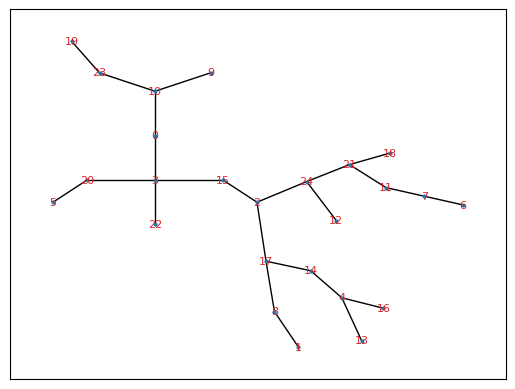

In [8]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

0: (18, 0, 3, 10)
10: (3, 0, 23, 9)
3: (15, 0, 22, 20)
9: (0, 1, None, None)
23: (1, 1, 19, None)
20: (1, 1, 5, None)
22: (0, 1, None, None)
15: (12, 1, 2, None)
19: (0, 1, None, None)
5: (0, 1, None, None)
2: (11, 1, 24, 17)
17: (5, 0, 14, 8)
24: (5, 1, 12, 21)
8: (1, 1, 1, None)
14: (2, 1, 4, None)
12: (0, 1, None, None)
21: (4, 0, 18, 11)
1: (0, 1, None, None)
4: (2, 0, 16, 13)
11: (2, 1, 7, None)
18: (0, 1, None, None)
13: (0, 1, None, None)
16: (0, 1, None, None)
7: (1, 1, 6, None)
6: (0, 1, None, None)
Path edges: [(10, 23), (10, 9), (3, 22), (3, 20), (23, 19), (20, 5), (15, 2), (2, 24), (17, 14), (17, 8), (24, 12), (8, 1), (21, 18), (21, 11), (4, 16), (4, 13), (11, 7), (7, 6)]
Total path length (x(root)): 18
Total path length (actual): 18
Difference: 0


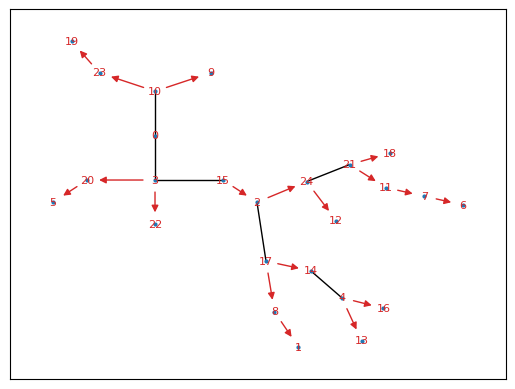

In [9]:
draw_tree(ones_tree, ones_layout)

In [10]:
util.path_cover_two(ones_tree)

{9: 0,
 22: 0,
 19: 0,
 5: 0,
 12: 0,
 1: 0,
 18: 0,
 13: 0,
 16: 0,
 6: 0,
 7: 1,
 11: 2,
 4: 2,
 21: 4,
 14: 2,
 8: 1,
 24: 5,
 17: 5,
 2: 11,
 15: 12,
 20: 1,
 23: 1,
 3: 15,
 10: 3,
 0: 18}